In [119]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
excel_data_df = pandas.read_excel('cm4107.xlsx', sheet_name='cm4107')

# print whole sheet data
excel_data_df


,Time,Event context,Component,Event name,Description,Origin,IP address
0,"19/08/19, 19:46",Study Area: [Module 2019/2020] CM4107 - Full T...,System,Course viewed,The user with id '230514' viewed the course wi...,web,146.198.29.219
1,"19/08/19, 19:46",Study Area: [Module 2019/2020] CM4107 - Full T...,User tours,Tour started,The user with id '230514' has started the tour...,web,146.198.29.219
2,"19/08/19, 19:46",Study Area: [Module 2019/2020] CM4107 - Full T...,User tours,Step shown,The user with id '230514' has viewed the tour ...,web,146.198.29.219
3,"27/08/19, 12:00",Study Area: [Module 2019/2020] CM4107 - Full T...,System,Course viewed,The user with id '230514' viewed the course wi...,web,10.85.33.155
4,"27/08/19, 12:06",Study Area: [Module 2019/2020] CM4107 - Full T...,System,Course viewed,The user with id '230514' viewed the course wi...,web,10.85.33.155
...,...,...,...,...,...,...,...
26711,"6/10/20, 13:36",Study Area: [Module 2019/2020] CM4107 - Full T...,Logs,Log report viewed,The user with id '230514' viewed the log repor...,web,147.147.109.112
26712,"6/10/20, 13:36",Study Area: [Module 2019/2020] CM4107 - Full T...,Logs,Log report viewed,The user with id '230514' viewed the log repor...,web,147.147.109.112
26713,"6/10/20, 13:39",Study Area: [Module 2019/2020] CM4107 - Full T...,Logs,Log report viewed,The user with id '230514' viewed the log repor...,web,147.147.109.112
26714,"6/10/20, 13:39",Study Area: [Module 2019/2020] CM4107 - Full T...,Logs,Log report viewed,The user with id '230514' viewed the log repor...,web,147.147.109.112


In [120]:
users_list = excel_data_df['Description'].tolist()

def getRequestsFromUsers(user_desc):
    requestsFromUsers = []
    for val in user_desc:
        #print(val)
        usersplit = (val.split(maxsplit=20))
        #split column into an array of strings
        for idx, val in enumerate(usersplit):
            #clean string
            val = val.replace('"', '')
            val = val.replace("'", '')
            #filter to first numeric value
            if((idx == 4) and (len(val) == 6 or len(val) == 2) and val[0].isdigit() ):
                requestsFromUsers += [val]
        
    return requestsFromUsers

requests_by_user_id = getRequestsFromUsers(users_list)
#print(requests_by_user_id)


<BarContainer object of 95 artists>

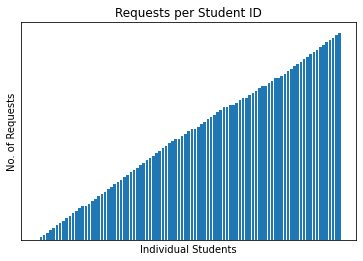

In [121]:
import collections

users_requests_with_count = collections.Counter(requests_by_user_id).most_common()

data = np.asarray(users_requests_with_count)
x,y = data.T

plt.xlabel('Individual Students')
plt.ylabel('No. of Requests')
plt.title('Requests per Student ID')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.bar(x,y)